# Train a logistic regression and gradient booster on the newly extracted features for 3 species, to get baseline to compare with neural network

Tuesday, May 15, 2018

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
import os
import sys

#Store the relative and absolute path to the home directory of the project
project_directory = '../..'
project_path = os.path.abspath(os.path.join(project_directory))

#Add the project path to the system path if necessesary, to be able to load modules from subdirectories
if project_path not in sys.path:
    sys.path.append(project_path)

In [4]:
import src.image_manager as im
import src.model_eval as meval

## Load the features dataframe, and pull out features (X) and labels (y)

In [5]:
feature_df_path = os.path.join(project_path, 'data', 'features_3species_20180514.csv')

In [6]:
tree_features_df = im.load_df(feature_df_path)
tree_features_df.head(10)

,p_hash,filename,folder,incv3_out_0,incv3_out_1,incv3_out_2,incv3_out_3,incv3_out_4,incv3_out_5,incv3_out_6,...,incv3_out_2038,incv3_out_2039,incv3_out_2040,incv3_out_2041,incv3_out_2042,incv3_out_2043,incv3_out_2044,incv3_out_2045,incv3_out_2046,incv3_out_2047
0,9bb759cb29b01a25,image_bigleaf_maple_57.png,acer_macrophyllum,0.180042,0.057599,0.632024,0.021612,0.297033,0.011966,0.903157,...,0.360490,0.009282,0.055258,0.110056,0.058888,0.201237,0.198077,1.394304,0.155102,0.000000
1,99c20b3b74d53de0,image_bigleaf_maple_43.png,acer_macrophyllum,0.667066,0.249269,0.074132,0.177577,0.520580,0.167225,0.233005,...,1.446164,0.920353,0.823285,0.617185,0.121126,0.065866,0.876259,0.226926,0.274808,0.000000
2,a1e1e0d4e646e765,image_big_leaf_maple_bark_48.png,acer_macrophyllum,0.159188,0.011783,0.187351,0.211521,0.466182,0.387081,0.217815,...,1.198391,0.460702,0.157247,0.267633,0.006349,0.466702,0.641492,1.066418,0.145887,0.223863
3,abee94c19cb28b0e,image_acer_macrophylum_tree_49.png,acer_macrophyllum,0.658278,0.010192,0.344359,0.192652,0.342696,0.362848,0.562928,...,0.257585,0.077631,0.057183,0.411228,0.417154,0.048589,0.421282,0.057896,0.325496,0.145896
4,d3c161631f2b4b4e,image_bigleaf_maple_94.png,acer_macrophyllum,0.056695,0.255299,0.407071,0.066481,0.000076,0.568202,0.362414,...,1.289151,0.578341,0.963826,0.028785,0.310883,0.001386,1.154405,0.034431,0.768076,0.217323
5,c891b35fed643432,image_bigleaf_maple_80.png,acer_macrophyllum,0.172878,1.239768,0.073451,0.114617,0.749507,0.468058,0.063693,...,0.577933,0.028477,0.530689,0.136387,0.034278,0.296235,0.534507,1.035326,0.531934,0.224123
6,b34194e34c0bf5d3,image_big_leaf_maple_bark_74.png,acer_macrophyllum,0.594098,0.062181,0.836759,0.115090,0.598241,0.024280,0.067991,...,1.314560,0.076663,0.010476,0.054213,0.152390,0.357750,0.449873,0.274064,0.318430,0.123310
7,db7431cef4184de0,image_acer_macrophylum_tree_75.png,acer_macrophyllum,0.871683,0.024620,0.751258,0.132360,0.273985,0.665380,0.223996,...,1.580070,0.025471,0.106593,0.012694,0.289734,0.116781,1.299327,0.073379,0.531902,0.328044
8,d00f7c177d248d27,image_acer_macrophylum_tree_61.png,acer_macrophyllum,0.709220,0.233107,0.881906,0.536572,0.130611,0.037191,0.056002,...,0.167330,0.042578,0.041194,0.010896,0.165957,0.631229,0.398123,1.241298,0.917581,0.083632
9,9f62153773335318,image_big_leaf_maple_bark_60.png,acer_macrophyllum,0.822585,0.058785,0.036226,0.407236,0.002089,0.047852,0.665772,...,0.697518,0.000000,0.000000,0.001717,0.000000,0.152118,0.055705,0.084068,0.000000,0.838002


In [9]:
X = tree_features_df.drop(['p_hash', 'filename', 'folder'], axis=1)
X.head()

,incv3_out_0,incv3_out_1,incv3_out_2,incv3_out_3,incv3_out_4,incv3_out_5,incv3_out_6,incv3_out_7,incv3_out_8,incv3_out_9,...,incv3_out_2038,incv3_out_2039,incv3_out_2040,incv3_out_2041,incv3_out_2042,incv3_out_2043,incv3_out_2044,incv3_out_2045,incv3_out_2046,incv3_out_2047
0,0.180042,0.057599,0.632024,0.021612,0.297033,0.011966,0.903157,1.185745,0.705980,0.150624,...,0.360490,0.009282,0.055258,0.110056,0.058888,0.201237,0.198077,1.394304,0.155102,0.000000
1,0.667066,0.249269,0.074132,0.177577,0.520580,0.167225,0.233005,1.123716,0.544970,0.793712,...,1.446164,0.920353,0.823285,0.617185,0.121126,0.065866,0.876259,0.226926,0.274808,0.000000
2,0.159188,0.011783,0.187351,0.211521,0.466182,0.387081,0.217815,0.470900,0.553186,0.176517,...,1.198391,0.460702,0.157247,0.267633,0.006349,0.466702,0.641492,1.066418,0.145887,0.223863
3,0.658278,0.010192,0.344359,0.192652,0.342696,0.362848,0.562928,0.133620,0.420587,0.228698,...,0.257585,0.077631,0.057183,0.411228,0.417154,0.048589,0.421282,0.057896,0.325496,0.145896
4,0.056695,0.255299,0.407071,0.066481,0.000076,0.568202,0.362414,0.189681,0.153133,0.169399,...,1.289151,0.578341,0.963826,0.028785,0.310883,0.001386,1.154405,0.034431,0.768076,0.217323


In [10]:
y = tree_features_df['folder']
y.head()

0    acer_macrophyllum
1    acer_macrophyllum
2    acer_macrophyllum
3    acer_macrophyllum
4    acer_macrophyllum
Name: folder, dtype: object

## Get a train-test split of the data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=359)
y_train.head()

4859    platanus_acerifolia
430       acer_macrophyllum
3723       picea_sitchensis
4893    platanus_acerifolia
5016    platanus_acerifolia
Name: folder, dtype: object

In [13]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1311 entries, 4859 to 4027
Columns: 2048 entries, incv3_out_0 to incv3_out_2047
dtypes: float64(2048)
memory usage: 20.5 MB


In [14]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328 entries, 244 to 4999
Columns: 2048 entries, incv3_out_0 to incv3_out_2047
dtypes: float64(2048)
memory usage: 5.1 MB


In [16]:
y_train.value_counts()

picea_sitchensis       461
platanus_acerifolia    438
acer_macrophyllum      412
Name: folder, dtype: int64

In [17]:
y_test.value_counts()

acer_macrophyllum      114
picea_sitchensis       111
platanus_acerifolia    103
Name: folder, dtype: int64

## Try a logistic regression with multinomial probabilities

In [35]:
log_model = LogisticRegression(multi_class='multinomial', solver='sag', C=0.001, max_iter=2000)

In [36]:
log_model.fit(X_train, y_train)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=2000, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

In [37]:
logeval = meval.ModelEvaluator(log_model)
logeval.print_classifier_metrics(X_train, X_test, y_train, y_test)

Train log_loss: 0.5944925029488596, Test log_loss: 0.6829306517753826
Train accuracy: 0.8283752860411899, Test accuracy: 0.7439024390243902


In [38]:
logeval.confusion_df(X_test, y_test)

,Predicted acer_macrophyllum,Predicted picea_sitchensis,Predicted platanus_acerifolia
Actual acer_macrophyllum,68,18,28
Actual picea_sitchensis,9,93,9
Actual platanus_acerifolia,8,12,83


In [39]:
logeval.confusion_df(X_train, y_train)

,Predicted acer_macrophyllum,Predicted picea_sitchensis,Predicted platanus_acerifolia
Actual acer_macrophyllum,289,38,85
Actual picea_sitchensis,34,414,13
Actual platanus_acerifolia,40,15,383


Wow, 74% accuracy for the simplest possible model! That's way better than my original models.

## Try logistic regression with lasso regularization

You must use the SAGA solver to use both L1 regularization and multinomial multi-class predictions (instead of one-vs-rest).

In [45]:
log_lasso_model = LogisticRegression(penalty='l1', multi_class='multinomial', solver='saga', C=0.1, max_iter=2000)

In [46]:
log_lasso_model.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=2000, multi_class='multinomial',
          n_jobs=1, penalty='l1', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

In [47]:
loglasso_eval = meval.ModelEvaluator(log_lasso_model)
loglasso_eval.print_classifier_metrics(X_train, X_test, y_train, y_test)

Train log_loss: 0.4498591818552623, Test log_loss: 0.5908337379635094
Train accuracy: 0.8405797101449275, Test accuracy: 0.7469512195121951


In [49]:
loglasso_eval.confusion_df(X_test, y_test)

,Predicted acer_macrophyllum,Predicted picea_sitchensis,Predicted platanus_acerifolia
Actual acer_macrophyllum,69,10,35
Actual picea_sitchensis,11,93,7
Actual platanus_acerifolia,9,11,83


In [48]:
loglasso_eval.confusion_df(X_train, y_train)

,Predicted acer_macrophyllum,Predicted picea_sitchensis,Predicted platanus_acerifolia
Actual acer_macrophyllum,300,28,84
Actual picea_sitchensis,31,419,11
Actual platanus_acerifolia,40,15,383


## Try a gradient booster

This takes about 3 minutes to train with parameters (learning_rate=0.01, n_estimators=200, subsample=0.5, max_depth=5)

In [50]:
gb_model = GradientBoostingClassifier(learning_rate=0.01, n_estimators=200, subsample=0.5, max_depth=5)

In [52]:
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=None, subsample=0.5, verbose=0,
              warm_start=False)

In [53]:
gbeval = meval.ModelEvaluator(gb_model)
gbeval.print_classifier_metrics(X_train, X_test, y_train, y_test)

Train log_loss: 0.2741725023525165, Test log_loss: 0.6391813639627187
Train accuracy: 0.996186117467582, Test accuracy: 0.7713414634146342


Woo hoo, lookin' good!

In [54]:
gbeval.confusion_df(X_test, y_test)

,Predicted acer_macrophyllum,Predicted picea_sitchensis,Predicted platanus_acerifolia
Actual acer_macrophyllum,69,14,31
Actual picea_sitchensis,7,98,6
Actual platanus_acerifolia,7,10,86


In [55]:
gbeval.confusion_df(X_train, y_train)

,Predicted acer_macrophyllum,Predicted picea_sitchensis,Predicted platanus_acerifolia
Actual acer_macrophyllum,409,0,3
Actual picea_sitchensis,2,459,0
Actual platanus_acerifolia,0,0,438


# Try plotting ternary plots of the predicted probabilities

Thursday, May 17, 2018

In [56]:
%matplotlib inline
import ternary

## Ridge Logistic regression

In [60]:
y_test.head(10)

244       acer_macrophyllum
124       acer_macrophyllum
3782       picea_sitchensis
4119       picea_sitchensis
4755    platanus_acerifolia
4592    platanus_acerifolia
424       acer_macrophyllum
4863    platanus_acerifolia
280       acer_macrophyllum
4881    platanus_acerifolia
Name: folder, dtype: object

In [61]:
y_pred_log = log_model.predict_proba(X_test)
y_pred_log[:10]

array([[ 0.54854573,  0.20912   ,  0.24233428],
       [ 0.3135284 ,  0.38906969,  0.29740191],
       [ 0.1670044 ,  0.69054903,  0.14244657],
       [ 0.16924266,  0.68527731,  0.14548003],
       [ 0.15959827,  0.38300111,  0.45740062],
       [ 0.20389564,  0.09663392,  0.69947044],
       [ 0.54935211,  0.02816209,  0.4224858 ],
       [ 0.20904742,  0.43572141,  0.35523116],
       [ 0.60230291,  0.30683657,  0.09086053],
       [ 0.64326565,  0.10736896,  0.24936539]])

In [63]:
log_model.classes_

array(['acer_macrophyllum', 'picea_sitchensis', 'platanus_acerifolia'], dtype=object)

In [65]:
len(y_pred_log[y_test=='acer_macrophyllum'])

114

In [66]:
y_pred_log[y_test=='acer_macrophyllum'][:10]

array([[ 0.54854573,  0.20912   ,  0.24233428],
       [ 0.3135284 ,  0.38906969,  0.29740191],
       [ 0.54935211,  0.02816209,  0.4224858 ],
       [ 0.60230291,  0.30683657,  0.09086053],
       [ 0.66267705,  0.08418319,  0.25313976],
       [ 0.3829095 ,  0.09375418,  0.52333632],
       [ 0.6179052 ,  0.21262787,  0.16946693],
       [ 0.57186299,  0.16118082,  0.26695619],
       [ 0.43027615,  0.17128822,  0.39843562],
       [ 0.47010615,  0.34656825,  0.1833256 ]])

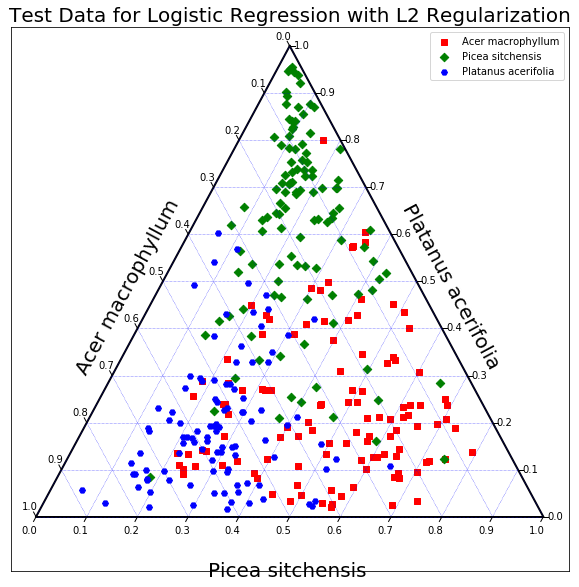

In [79]:
# Based on code from Yichen Qiu
# Scatter Plot
scale = 1
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(10, 10)

#Code from https://github.com/marcharper/python-ternary/blob/master/examples/Ternary-Examples.ipynb
fontsize = 20
tax.set_title("Test Data for Logistic Regression with L2 Regularization", fontsize=fontsize)
tax.left_axis_label("Acer macrophyllum", fontsize=fontsize)
tax.bottom_axis_label("Picea sitchensis", fontsize=fontsize)
tax.right_axis_label("Platanus acerifolia", fontsize=fontsize)


tax.boundary(linewidth=2.0)
tax.gridlines(multiple=0.1, color="blue")

points = y_pred_log[y_test=='acer_macrophyllum']
tax.scatter(points, marker='s', color='red', label="Acer macrophyllum")

points = y_pred_log[y_test=='picea_sitchensis']
tax.scatter(points, marker='D', color='green', label="Picea sitchensis")

points = y_pred_log[y_test=='platanus_acerifolia']
tax.scatter(points, marker='H', color='blue', label="Platanus acerifolia")

tax.legend()
tax.ticks(axis='lbr', linewidth=1, multiple=0.1,tick_formats='%.1f')
tax.clear_matplotlib_ticks()

tax.show()

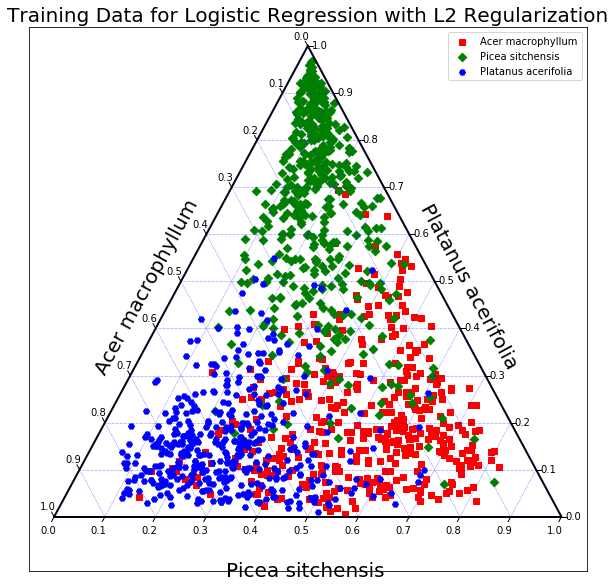

In [80]:
y_pred_train_log = log_model.predict_proba(X_train)

# Based on code from Yichen Qiu
# Scatter Plot
scale = 1
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(10, 10)

#Code from https://github.com/marcharper/python-ternary/blob/master/examples/Ternary-Examples.ipynb
fontsize = 20
tax.set_title("Training Data for Logistic Regression with L2 Regularization", fontsize=fontsize)
tax.left_axis_label("Acer macrophyllum", fontsize=fontsize)
tax.bottom_axis_label("Picea sitchensis", fontsize=fontsize)
tax.right_axis_label("Platanus acerifolia", fontsize=fontsize)


tax.boundary(linewidth=2.0)
tax.gridlines(multiple=0.1, color="blue")

points = y_pred_train_log[y_train=='acer_macrophyllum']
tax.scatter(points, marker='s', color='red', label="Acer macrophyllum")

points = y_pred_train_log[y_train=='picea_sitchensis']
tax.scatter(points, marker='D', color='green', label="Picea sitchensis")

points = y_pred_train_log[y_train=='platanus_acerifolia']
tax.scatter(points, marker='H', color='blue', label="Platanus acerifolia")

tax.legend()
tax.ticks(axis='lbr', linewidth=1, multiple=0.1,tick_formats='%.1f')
tax.clear_matplotlib_ticks()

tax.show()

## Lasso logistic regression

In [70]:
y_pred_log_lasso = log_lasso_model.predict_proba(X_test)
y_pred_log_lasso[:10]

array([[ 0.75060724,  0.15980975,  0.08958301],
       [ 0.35270565,  0.38813638,  0.25915798],
       [ 0.17712529,  0.51894222,  0.30393249],
       [ 0.06523102,  0.90906093,  0.02570805],
       [ 0.10754447,  0.36994382,  0.52251171],
       [ 0.10753295,  0.0313103 ,  0.86115675],
       [ 0.42663778,  0.00446651,  0.56889571],
       [ 0.11938627,  0.24115842,  0.63945531],
       [ 0.7353065 ,  0.23973451,  0.02495899],
       [ 0.62309825,  0.02732532,  0.34957643]])

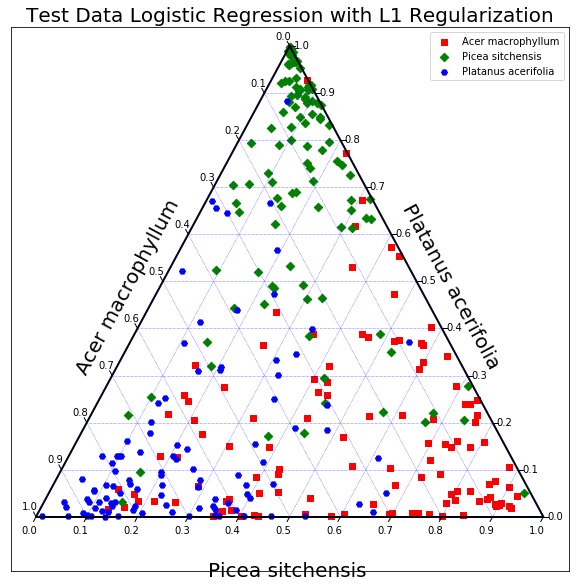

In [84]:
# Scatter Plot
scale = 1
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(10, 10)

fontsize = 20
tax.set_title("Test Data Logistic Regression with L1 Regularization", fontsize=fontsize)
tax.left_axis_label("Acer macrophyllum", fontsize=fontsize)
tax.bottom_axis_label("Picea sitchensis", fontsize=fontsize)
tax.right_axis_label("Platanus acerifolia", fontsize=fontsize)

tax.boundary(linewidth=2.0)
tax.gridlines(multiple=0.1, color="blue")

points = y_pred_log_lasso[y_test=='acer_macrophyllum']
tax.scatter(points, marker='s', color='red', label="Acer macrophyllum")

points = y_pred_log_lasso[y_test=='picea_sitchensis']
tax.scatter(points, marker='D', color='green', label="Picea sitchensis")

points = y_pred_log_lasso[y_test=='platanus_acerifolia']
tax.scatter(points, marker='H', color='blue', label="Platanus acerifolia")

tax.legend()
tax.ticks(axis='lbr', linewidth=1, multiple=0.1,tick_formats='%.1f')
tax.clear_matplotlib_ticks()

tax.show()

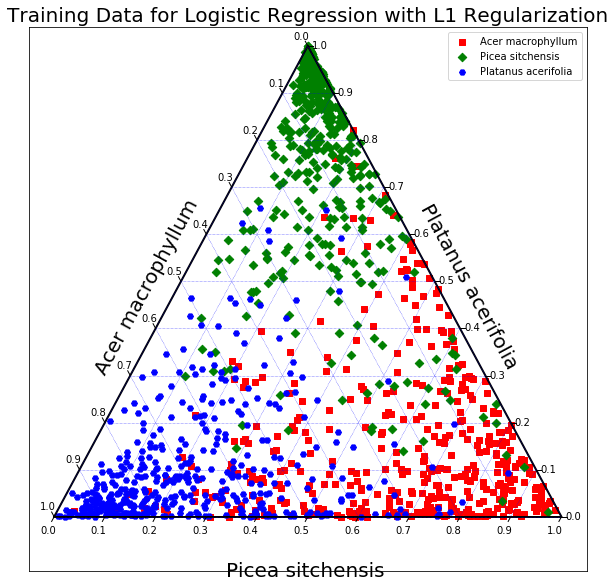

In [83]:
y_pred_train_log_lasso = log_lasso_model.predict_proba(X_train)

# Based on code from Yichen Qiu
# Scatter Plot
scale = 1
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(10, 10)

#Code from https://github.com/marcharper/python-ternary/blob/master/examples/Ternary-Examples.ipynb
fontsize = 20
tax.set_title("Training Data for Logistic Regression with L1 Regularization", fontsize=fontsize)
tax.left_axis_label("Acer macrophyllum", fontsize=fontsize)
tax.bottom_axis_label("Picea sitchensis", fontsize=fontsize)
tax.right_axis_label("Platanus acerifolia", fontsize=fontsize)


tax.boundary(linewidth=2.0)
tax.gridlines(multiple=0.1, color="blue")

points = y_pred_train_log_lasso[y_train=='acer_macrophyllum']
tax.scatter(points, marker='s', color='red', label="Acer macrophyllum")

points = y_pred_train_log_lasso[y_train=='picea_sitchensis']
tax.scatter(points, marker='D', color='green', label="Picea sitchensis")

points = y_pred_train_log_lasso[y_train=='platanus_acerifolia']
tax.scatter(points, marker='H', color='blue', label="Platanus acerifolia")

tax.legend()
tax.ticks(axis='lbr', linewidth=1, multiple=0.1,tick_formats='%.1f')
tax.clear_matplotlib_ticks()

tax.show()

## Gradient booster

In [76]:
y_pred_gb = gb_model.predict_proba(X_test)
y_pred_gb[:10]

array([[ 0.51113748,  0.36625254,  0.12260997],
       [ 0.27878552,  0.36038395,  0.36083053],
       [ 0.14311193,  0.74083112,  0.11605695],
       [ 0.09460183,  0.81064356,  0.09475461],
       [ 0.1645191 ,  0.27506058,  0.56042032],
       [ 0.14680474,  0.07676301,  0.77643224],
       [ 0.45999261,  0.08500607,  0.45500132],
       [ 0.16794492,  0.4487796 ,  0.38327548],
       [ 0.50322645,  0.36618952,  0.13058404],
       [ 0.47343613,  0.17382077,  0.3527431 ]])

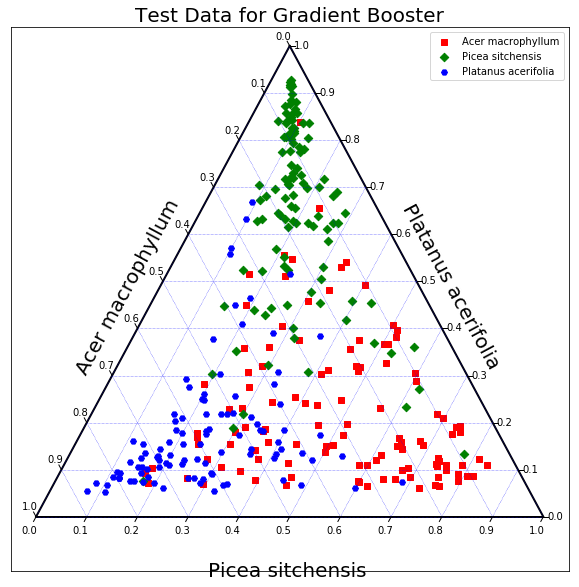

In [85]:
# Scatter Plot
scale = 1
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(10, 10)

fontsize = 20
tax.set_title("Test Data for Gradient Booster", fontsize=fontsize)
tax.left_axis_label("Acer macrophyllum", fontsize=fontsize)
tax.bottom_axis_label("Picea sitchensis", fontsize=fontsize)
tax.right_axis_label("Platanus acerifolia", fontsize=fontsize)

tax.boundary(linewidth=2.0)
tax.gridlines(multiple=0.1, color="blue")

points = y_pred_gb[y_test=='acer_macrophyllum']
tax.scatter(points, marker='s', color='red', label="Acer macrophyllum")

points = y_pred_gb[y_test=='picea_sitchensis']
tax.scatter(points, marker='D', color='green', label="Picea sitchensis")

points = y_pred_gb[y_test=='platanus_acerifolia']
tax.scatter(points, marker='H', color='blue', label="Platanus acerifolia")

tax.legend()
tax.ticks(axis='lbr', linewidth=1, multiple=0.1,tick_formats='%.1f')
tax.clear_matplotlib_ticks()

tax.show()

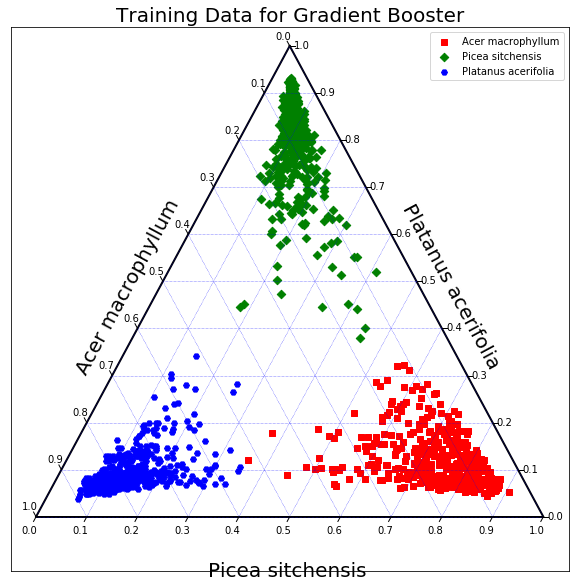

In [81]:
y_pred_train_gb = gb_model.predict_proba(X_train)

# Based on code from Yichen Qiu
# Scatter Plot
scale = 1
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(10, 10)

#Code from https://github.com/marcharper/python-ternary/blob/master/examples/Ternary-Examples.ipynb
fontsize = 20
tax.set_title("Training Data for Gradient Booster", fontsize=fontsize)
tax.left_axis_label("Acer macrophyllum", fontsize=fontsize)
tax.bottom_axis_label("Picea sitchensis", fontsize=fontsize)
tax.right_axis_label("Platanus acerifolia", fontsize=fontsize)


tax.boundary(linewidth=2.0)
tax.gridlines(multiple=0.1, color="blue")

points = y_pred_train_gb[y_train=='acer_macrophyllum']
tax.scatter(points, marker='s', color='red', label="Acer macrophyllum")

points = y_pred_train_gb[y_train=='picea_sitchensis']
tax.scatter(points, marker='D', color='green', label="Picea sitchensis")

points = y_pred_train_gb[y_train=='platanus_acerifolia']
tax.scatter(points, marker='H', color='blue', label="Platanus acerifolia")

tax.legend()
tax.ticks(axis='lbr', linewidth=1, multiple=0.1,tick_formats='%.1f')
tax.clear_matplotlib_ticks()

tax.show()

## Save predicted probabilities to file

In [88]:
image_df = tree_features_df[['p_hash', 'filename', 'folder']]
image_df.head()

,p_hash,filename,folder
0,9bb759cb29b01a25,image_bigleaf_maple_57.png,acer_macrophyllum
1,99c20b3b74d53de0,image_bigleaf_maple_43.png,acer_macrophyllum
2,a1e1e0d4e646e765,image_big_leaf_maple_bark_48.png,acer_macrophyllum
3,abee94c19cb28b0e,image_acer_macrophylum_tree_49.png,acer_macrophyllum
4,d3c161631f2b4b4e,image_bigleaf_maple_94.png,acer_macrophyllum


In [102]:
train_images = image_df.loc[X_train.index,:]
train_images.head()

,p_hash,filename,folder
4859,b483ca6d35c26be4,image_platanus_acerifolia_70.png,platanus_acerifolia
430,eab824d0f0275ff0,image_acer_macrophylum_48.png,acer_macrophyllum
3723,96c6eee1342fd0e0,image_sitka_spruce_branches_72.png,picea_sitchensis
4893,87d2ba615925e69c,image_platanus_acerifolia_in_winter_67.png,platanus_acerifolia
5016,bf9ec061679319a8,image_platanus_acerifolia_15.png,platanus_acerifolia


In [107]:
test_images = image_df.loc[X_test.index,:]
test_images.head()

,p_hash,filename,folder
244,ab968dad2c68b92a,image_bigleaf_maple_forest_79.png,acer_macrophyllum
124,fa4ec0900fca3e2f,image_acer_macrophylum_seeds_55.png,acer_macrophyllum
3782,919754baa2265e6b,image_sitka_spruce_cones_11.png,picea_sitchensis
4119,bec0a0ee99265f64,image_picea_sitchensis_in_winter_37.png,picea_sitchensis
4755,cf677c013aba0743,image_platanus_acerifolia_in_winter_84.png,platanus_acerifolia


### Logistic L2

In [94]:
log_model.classes_

array(['acer_macrophyllum', 'picea_sitchensis', 'platanus_acerifolia'], dtype=object)

In [100]:
y_pred_train_log[:10]

array([[ 0.17842991,  0.18353085,  0.63803924],
       [ 0.38518095,  0.28869383,  0.32612522],
       [ 0.09212695,  0.88136309,  0.02650996],
       [ 0.28370324,  0.11339383,  0.60290293],
       [ 0.16137866,  0.132803  ,  0.70581834],
       [ 0.55111996,  0.22292387,  0.22595618],
       [ 0.58770813,  0.18940856,  0.22288331],
       [ 0.44782016,  0.18066785,  0.37151199],
       [ 0.1143375 ,  0.05958046,  0.82608204],
       [ 0.43002051,  0.14690975,  0.42306975]])

In [98]:
logl2_cols = ['prob_logl2_' + species for species in log_model.classes_]
logl2_cols

['prob_logl2_acer_macrophyllum',
 'prob_logl2_picea_sitchensis',
 'prob_logl2_platanus_acerifolia']

In [104]:
train_images[logl2_cols] = pd.DataFrame(y_pred_train_log, index = train_images.index)
train_images.head()

,p_hash,filename,folder,prob_logl2_acer_macrophyllum,prob_logl2_picea_sitchensis,prob_logl2_platanus_acerifolia
4859,b483ca6d35c26be4,image_platanus_acerifolia_70.png,platanus_acerifolia,0.178430,0.183531,0.638039
430,eab824d0f0275ff0,image_acer_macrophylum_48.png,acer_macrophyllum,0.385181,0.288694,0.326125
3723,96c6eee1342fd0e0,image_sitka_spruce_branches_72.png,picea_sitchensis,0.092127,0.881363,0.026510
4893,87d2ba615925e69c,image_platanus_acerifolia_in_winter_67.png,platanus_acerifolia,0.283703,0.113394,0.602903
5016,bf9ec061679319a8,image_platanus_acerifolia_15.png,platanus_acerifolia,0.161379,0.132803,0.705818


In [108]:
test_images[logl2_cols] = pd.DataFrame(y_pred_log, index = test_images.index)
test_images.head()

,p_hash,filename,folder,prob_logl2_acer_macrophyllum,prob_logl2_picea_sitchensis,prob_logl2_platanus_acerifolia
244,ab968dad2c68b92a,image_bigleaf_maple_forest_79.png,acer_macrophyllum,0.548546,0.209120,0.242334
124,fa4ec0900fca3e2f,image_acer_macrophylum_seeds_55.png,acer_macrophyllum,0.313528,0.389070,0.297402
3782,919754baa2265e6b,image_sitka_spruce_cones_11.png,picea_sitchensis,0.167004,0.690549,0.142447
4119,bec0a0ee99265f64,image_picea_sitchensis_in_winter_37.png,picea_sitchensis,0.169243,0.685277,0.145480
4755,cf677c013aba0743,image_platanus_acerifolia_in_winter_84.png,platanus_acerifolia,0.159598,0.383001,0.457401


### Logistic L1

In [105]:
logl1_cols = ['prob_logl1_' + species for species in log_lasso_model.classes_]
logl1_cols

['prob_logl1_acer_macrophyllum',
 'prob_logl1_picea_sitchensis',
 'prob_logl1_platanus_acerifolia']

In [106]:
train_images[logl1_cols] = pd.DataFrame(y_pred_train_log_lasso, index = train_images.index)
train_images.head()

,p_hash,filename,folder,prob_logl2_acer_macrophyllum,prob_logl2_picea_sitchensis,prob_logl2_platanus_acerifolia,prob_logl1_acer_macrophyllum,prob_logl1_picea_sitchensis,prob_logl1_platanus_acerifolia
4859,b483ca6d35c26be4,image_platanus_acerifolia_70.png,platanus_acerifolia,0.178430,0.183531,0.638039,0.077894,0.073958,0.848147
430,eab824d0f0275ff0,image_acer_macrophylum_48.png,acer_macrophyllum,0.385181,0.288694,0.326125,0.523094,0.261840,0.215066
3723,96c6eee1342fd0e0,image_sitka_spruce_branches_72.png,picea_sitchensis,0.092127,0.881363,0.026510,0.008962,0.989278,0.001760
4893,87d2ba615925e69c,image_platanus_acerifolia_in_winter_67.png,platanus_acerifolia,0.283703,0.113394,0.602903,0.254364,0.033022,0.712613
5016,bf9ec061679319a8,image_platanus_acerifolia_15.png,platanus_acerifolia,0.161379,0.132803,0.705818,0.096110,0.024797,0.879093


In [110]:
test_images[logl1_cols] = pd.DataFrame(y_pred_log_lasso, index = test_images.index)
test_images.head()

,p_hash,filename,folder,prob_logl2_acer_macrophyllum,prob_logl2_picea_sitchensis,prob_logl2_platanus_acerifolia,prob_logl1_acer_macrophyllum,prob_logl1_picea_sitchensis,prob_logl1_platanus_acerifolia
244,ab968dad2c68b92a,image_bigleaf_maple_forest_79.png,acer_macrophyllum,0.548546,0.209120,0.242334,0.750607,0.159810,0.089583
124,fa4ec0900fca3e2f,image_acer_macrophylum_seeds_55.png,acer_macrophyllum,0.313528,0.389070,0.297402,0.352706,0.388136,0.259158
3782,919754baa2265e6b,image_sitka_spruce_cones_11.png,picea_sitchensis,0.167004,0.690549,0.142447,0.177125,0.518942,0.303932
4119,bec0a0ee99265f64,image_picea_sitchensis_in_winter_37.png,picea_sitchensis,0.169243,0.685277,0.145480,0.065231,0.909061,0.025708
4755,cf677c013aba0743,image_platanus_acerifolia_in_winter_84.png,platanus_acerifolia,0.159598,0.383001,0.457401,0.107544,0.369944,0.522512


### Gradient Booster

In [111]:
gb_cols = ['prob_gb_' + species for species in gb_model.classes_]
gb_cols

['prob_gb_acer_macrophyllum',
 'prob_gb_picea_sitchensis',
 'prob_gb_platanus_acerifolia']

In [112]:
train_images[gb_cols] = pd.DataFrame(y_pred_train_gb, index = train_images.index)
train_images.head()

,p_hash,filename,folder,prob_logl2_acer_macrophyllum,prob_logl2_picea_sitchensis,prob_logl2_platanus_acerifolia,prob_logl1_acer_macrophyllum,prob_logl1_picea_sitchensis,prob_logl1_platanus_acerifolia,prob_gb_acer_macrophyllum,prob_gb_picea_sitchensis,prob_gb_platanus_acerifolia
4859,b483ca6d35c26be4,image_platanus_acerifolia_70.png,platanus_acerifolia,0.178430,0.183531,0.638039,0.077894,0.073958,0.848147,0.072220,0.086408,0.841372
430,eab824d0f0275ff0,image_acer_macrophylum_48.png,acer_macrophyllum,0.385181,0.288694,0.326125,0.523094,0.261840,0.215066,0.640437,0.133107,0.226456
3723,96c6eee1342fd0e0,image_sitka_spruce_branches_72.png,picea_sitchensis,0.092127,0.881363,0.026510,0.008962,0.989278,0.001760,0.057441,0.894977,0.047583
4893,87d2ba615925e69c,image_platanus_acerifolia_in_winter_67.png,platanus_acerifolia,0.283703,0.113394,0.602903,0.254364,0.033022,0.712613,0.150908,0.093110,0.755982
5016,bf9ec061679319a8,image_platanus_acerifolia_15.png,platanus_acerifolia,0.161379,0.132803,0.705818,0.096110,0.024797,0.879093,0.093978,0.082140,0.823882


In [113]:
test_images[gb_cols] = pd.DataFrame(y_pred_gb, index = test_images.index)
test_images.head()

,p_hash,filename,folder,prob_logl2_acer_macrophyllum,prob_logl2_picea_sitchensis,prob_logl2_platanus_acerifolia,prob_logl1_acer_macrophyllum,prob_logl1_picea_sitchensis,prob_logl1_platanus_acerifolia,prob_gb_acer_macrophyllum,prob_gb_picea_sitchensis,prob_gb_platanus_acerifolia
244,ab968dad2c68b92a,image_bigleaf_maple_forest_79.png,acer_macrophyllum,0.548546,0.209120,0.242334,0.750607,0.159810,0.089583,0.511137,0.366253,0.122610
124,fa4ec0900fca3e2f,image_acer_macrophylum_seeds_55.png,acer_macrophyllum,0.313528,0.389070,0.297402,0.352706,0.388136,0.259158,0.278786,0.360384,0.360831
3782,919754baa2265e6b,image_sitka_spruce_cones_11.png,picea_sitchensis,0.167004,0.690549,0.142447,0.177125,0.518942,0.303932,0.143112,0.740831,0.116057
4119,bec0a0ee99265f64,image_picea_sitchensis_in_winter_37.png,picea_sitchensis,0.169243,0.685277,0.145480,0.065231,0.909061,0.025708,0.094602,0.810644,0.094755
4755,cf677c013aba0743,image_platanus_acerifolia_in_winter_84.png,platanus_acerifolia,0.159598,0.383001,0.457401,0.107544,0.369944,0.522512,0.164519,0.275061,0.560420


In [117]:
train_images_path = os.path.join(project_path, 'data', 'predictions_3species_train_20180518.csv')
test_images_path = os.path.join(project_path, 'data', 'predictions_3species_test_20180518.csv')

In [118]:
im.export_df(train_images, train_images_path)
im.export_df(test_images, test_images_path)

In [121]:
!ls -l ../../data

total 212656
-rw-r--r--  1 ndbs  staff  64733256 May 15 22:05 features_3species_20180514.csv
-rw-r--r--  1 ndbs  staff     25651 Feb  7 16:01 gb_confusion.png
-rw-r--r--  1 ndbs  staff   3105147 Feb  1 16:44 gb_model_jan30.pkl
-rw-r--r--  1 ndbs  staff    488281 Feb  5 00:30 image_log_20180204.csv
-rw-r--r--  1 ndbs  staff    711665 Feb  5 22:03 image_log_20180205.csv
-rw-r--r--  1 ndbs  staff    707031 May 11 18:34 image_log_20180511.csv
-rw-r--r--  1 ndbs  staff       141 Feb  4 22:51 image_syncs_20180204.csv
-rw-r--r--  1 ndbs  staff       427 Feb  5 22:03 image_syncs_20180205.csv
-rw-r--r--  1 ndbs  staff       324 May 11 18:34 image_syncs_20180511.csv
-rw-r--r--  1 ndbs  staff     82211 May 18 16:51 predictions_3species_test_20180518.csv
-rw-r--r--  1 ndbs  staff    328985 May 18 16:51 predictions_3species_train_20180518.csv
-rw-r--r--  1 ndbs  staff     74715 Jan 30 12:03 tree_image_info.csv
-rw-r--r--  1 ndbs  staff  37792669 Jan 30 11:46 tree_images.csv


In [120]:
!head ../../data/predictions_3species_test_20180518.csv

|p_hash|filename|folder|prob_logl2_acer_macrophyllum|prob_logl2_picea_sitchensis|prob_logl2_platanus_acerifolia|prob_logl1_acer_macrophyllum|prob_logl1_picea_sitchensis|prob_logl1_platanus_acerifolia|prob_gb_acer_macrophyllum|prob_gb_picea_sitchensis|prob_gb_platanus_acerifolia
244|ab968dad2c68b92a|image_bigleaf_maple_forest_79.png|acer_macrophyllum|0.5485457259772932|0.20911999649789656|0.2423342775248102|0.7506072395418104|0.15980975313366239|0.08958300732452709|0.5111374837017801|0.36625254267257407|0.12260997362564587
124|fa4ec0900fca3e2f|image_acer_macrophylum_seeds_55.png|acer_macrophyllum|0.3135283990870621|0.3890696894352941|0.2974019114776437|0.3527056481549344|0.38813637599785383|0.2591579758472118|0.27878551930945095|0.36038394919839284|0.3608305314921564
3782|919754baa2265e6b|image_sitka_spruce_cones_11.png|picea_sitchensis|0.16700439886163013|0.6905490304275418|0.1424465707108281|0.1771252930511575|0.5189422195677592|0.30393248738108325|0.14311193334771657|0.74083111553988